# Handin 2

A signal of the form
    
    y(x)=8cos(x)-3sin(7x)
is sent by a cable and disrupted by noise. We wish to alter the signal, which is recieved so as to minimize the noise.

In [1]:
import numpy as np

def y(x): # y(x) implemented in python
    return 8 * np.cos(x) - 3 * np.sin(7*x)

#### (a) Plot the function over the interval [0,9]

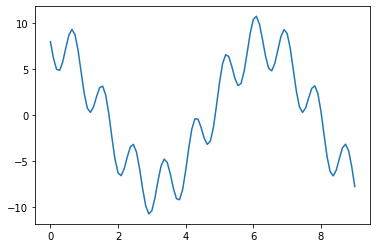

In [2]:
import matplotlib.pyplot as plt

xMin = 0
xMax = 9
n   = 100

x = np.linspace(xMin, xMax, n)

fig, ax = plt.subplots()
ax.plot(x, y(x))

#### (b) Use the following snippet to add noise and plot the result.

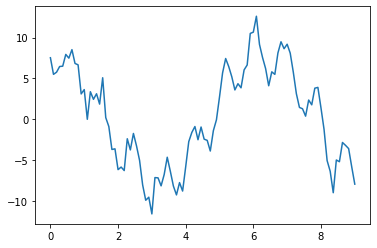

In [3]:
rng = np.random.default_rng()
noise = rng.standard_normal(n)

y_noisy = y(x) + noise

fig, ax = plt.subplots()
ax.plot(x, y_noisy)

#### (c) Create a matrix with 1/3's in the diagonals, using diag() and ones()

In [4]:
def thirdsDiag(n): # Returns a n*n matrix with 1/3 in the diagonal
    # Create 2 vectors with all ones.
    v_1 = np.ones((1,n-1)) # Remove one to fit in the matrix
    v_2 = np.ones((1,n  ))

    # Make the vectors into diagonals
    r_1 = np.diag(v_1[0], 1)
    r_2 = np.diag(v_2[0], 0)
    r_3 = np.diag(v_1[0], -1)
    
    # Add the diagonals together and perform scalar multiplication
    return (r_1+r_2+r_3)*(1/3)

print(thirdsDiag(5))

[[0.33333333 0.33333333 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.33333333 0.33333333]]


### (d) Plot $Ay_{noisy}$. Why is it closer to $y$ than to $y_{noisy}$? 

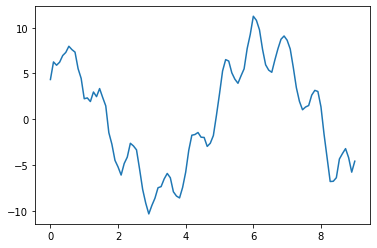

In [5]:
A = thirdsDiag(n)
Ay_noisy = A@(y(x) + noise)

fig, ax = plt.subplots()
ax.plot(x, Ay_noisy)

#### Why is it closer to $y$ than $y_{noise}$?

First we will expand the result to

$$A\cdot y_{noise} = A(y+noise) = Ay + Anoise$$


Now we'll take a look at the right hand side $Ay + Anoise$

More specificially we'll discuss the $noise$. $noise$ is a series of $n$ values picked from a normal distribution with mean $\mu = 0$ 

The result of this is that 
$$\lim_{n\to \infty}\sum_{i=0}^{n-1} noise[i] = 0$$

Now suppose we pick a value in position $k$ and let $noise[k]$ be some value $x_{k}$.
Now lets suppose we pick the values adjecent from it $x_{k-1}$ and $x_{k+1}$ and take the sum of them 
$$\sum_{i=k-1}^{k+1} noise[i]$$
Assuming the values, when generated, are picked independently this sum approaches $0$ as the amount of adjecent values are picked

Now we multiply the noise vector $\begin{bmatrix}x_1\\x_2\\ \vdots\\ x_n\end{bmatrix}$ by the $n\times n$ matrix A we defined before.

$$Anoise=\begin{bmatrix}
\frac{1}{3}x_1 + \frac{1}{3}x_2\\
\frac{1}{3}x_1 + \frac{1}{3}x_2 + \frac{1}{3}x_3\\
\frac{1}{3}x_2 + \frac{1}{3}x_3 + \frac{1}{3}x_4\\
\vdots\ \ \ \ \ \vdots\ \ \ \ \   \vdots\\
\frac{1}{3}x_{n-2} + \frac{1}{3}x_{n-1} + \frac{1}{3}x_n\\
         \frac{1}{3}x_{n-1} + \frac{1}{3}x_n\end{bmatrix}$$

As we can see, we are averaging the values of each noise by the surrounding values. Like discussed before, we expect the sum of adjecent valus to trend towards $0$.

Now look at $y$, which is the vector

$$y = \begin{bmatrix} 
8cos(x_1) - 3sin(7x_1)\\ 
8cos(x_2) - 3sin(7x_2)\\
\vdots \\
8cos(x_n) - 3sin(7x_n)\\ 
\end{bmatrix}$$
where $x \in \{v\in [0,9] \land |v_i-v_{i+1}| = \frac{9}{n}\}$


Then we multiply it by the matrix $A$

$$Ay = \begin{bmatrix} 
\frac{1}{3}(8cos(x_1) - 3sin(7x_1)) + \frac{1}{3}(8cos(x_2) - 3sin(7x_2))\\ 
\frac{1}{3}(8cos(x_1) - 3sin(7x_1)) + \frac{1}{3}(8cos(x_2) - 3sin(7x_2))+ \frac{1}{3}(8cos(x_3) - 3sin(7x_3))\\
\frac{1}{3}(8cos(x_2) - 3sin(7x_2)) + \frac{1}{3}(8cos(x_3) - 3sin(7x_3))+ \frac{1}{3}(8cos(x_4) - 3sin(7x_4))\\
\vdots \\
\frac{1}{3}(8cos(x_{n-2}) - 3sin(7x_{n-2})) + \frac{1}{3}(8cos(x_{n-1}) - 3sin(7x_{n-1}))+ \frac{1}{3}(8cos(x_n) - 3sin(7x_n))\\ 
\frac{1}{3}(8cos(x_{n-1}) - 3sin(7x_{n-1}))+ \frac{1}{3}(8cos(x_n) - 3sin(7x_n))\\ 
\end{bmatrix}$$

Just like before we are averaging the values with the ones nearby, but since these values aren't random and independent we are just lowering the amplitude slighlty, since peaks are averaged with nearby lower values and bottom of valleys are averaged with slightly higher nearby values. 

The y(x) curve is continueous and sampling points at most $\frac{9}{n}$ apart resuls in negligible change as $n$ becomes large. 


In conclusion, as we are averaging the noise, it converges towards to 0, and as we are averaging the signal, we recieves the same signal, but with slightly lower amplitude.

### (e) By altering A, we may achieve a better level of noise reduction. Find an example B where $By_{noise}$ has a better noise reduction than $Ay_{noise}$

Firstly let's make some metric for measuring the noisy cancelling property.

For this we assume that the average difference of $My_{noisy}$ and $y(x)$ should approach $0$ as the matrix M is multiplied onto it, for it to be an improved noise reducing matrix.

The average difference will be calculated as

$$\frac{\sum_{i\in x} |My_{noisy}[i] - y(i)|}{n}$$

The improved matrix, favours the diagonal and will be the matrix 

$$B = \begin{bmatrix}
\frac{3}{7} & \frac{2}{7} & \cdots & \cdots & 0 \\
\frac{2}{7} & \frac{3}{7} & \frac{2}{7} & \cdots & 0 \\
 0 & \frac{2}{7} & \frac{3}{7} & \cdots & 0 \\
 0 & \vdots & \frac{2}{7} & \cdots & 0 \\
 \vdots & \vdots & \ddots & \ddots & \vdots \\
  0& 0 & 0 & \frac{2}{7} & \frac{3}{7}\\
\end{bmatrix}$$

The improvement is demonstrated with the code below

Average difference for A @ y_noisy  0.6665580096496052
Average difference for B @ y_noisy  0.6439165884923165


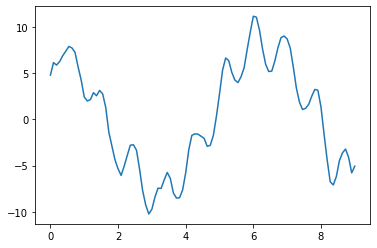

In [6]:
def generate_B():
    # Create 2 vectors with all ones.
    v_1 = np.ones((1,99)) # Remove one to fit in the matrix
    v_2 = np.ones((1,100  ))

    # Make the vectors into diagonals
    r_1 = np.diag(v_1[0], 1)
    r_2 = np.diag(v_2[0], 0)
    r_3 = np.diag(v_1[0], -1)
    
    # Add the diagonals together and perform scalar multiplication
    return  (r_1 * (2/7) +
             r_2 * (3/7) +
             r_3 * (2/7) )

B = generate_B()

diffB = np.abs(B @ y_noisy - y(x))
diffA = np.abs(A @ y_noisy - y(x))

avgDiffB = diffB.sum()/n
avgDiffA = diffA.sum()/n

print("Average difference for A @ y_noisy ", avgDiffA)
print("Average difference for B @ y_noisy ", avgDiffB)

fig, ax = plt.subplots()
ax.plot(x, B @ y_noisy)
